# Data analises house prices

In this notebook we separate the data in numeric and categorical features in order to do two diferent kinds of data analises. For numerical feature we analise the correlations between all features and SalesPrice. For categorical features we analise the frequency of each category of the categorical features versus the mean value and variance of SalesPrice.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from math import sqrt
from numpy import random
from scipy import stats as stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Imports data and describes the statistics

Let's begin displaying The first values of our data:

In [3]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here we displaying the main caracteristiccs of our numeric features:

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.shape

(1460, 81)

# Statistics of Selling Price

In [6]:
print('The mean price is: %.2f' %(train.SalePrice.mean()))
print('The standard deviation is: %.2f'%(train.SalePrice.std()))
print('The median price is: %.2f' %(np.percentile(train.SalePrice,50)))
print('We have the mean price bigger than the median price. This is a caracteristic of a dataset with a positive skew.')
print('The minimum price is: %.2f, which is very far from the first quantile: %.2f'%(train.SalePrice.min(), train.SalePrice.quantile(0.25)))
print('And the maximum price is:  %.2f, which is very far from the third quantile %.2f' %(train.SalePrice.max(), train.SalePrice.quantile(0.75)))
print('In conclusion, we have a dataset with a positive skew and outliers on both sides.')

The mean price is: 180921.20
The standard deviation is: 79442.50
The median price is: 163000.00
We have the mean price bigger than the median price. This is a caracteristic of a dataset with a positive skew.
The minimum price is: 34900.00, which is very far from the first quantile: 129975.00
And the maximum price is:  755000.00, which is very far from the third quantile 214000.00
In conclusion, we have a dataset with a positive skew and outliers on both sides.


Text(0, 0.5, 'Frequency')

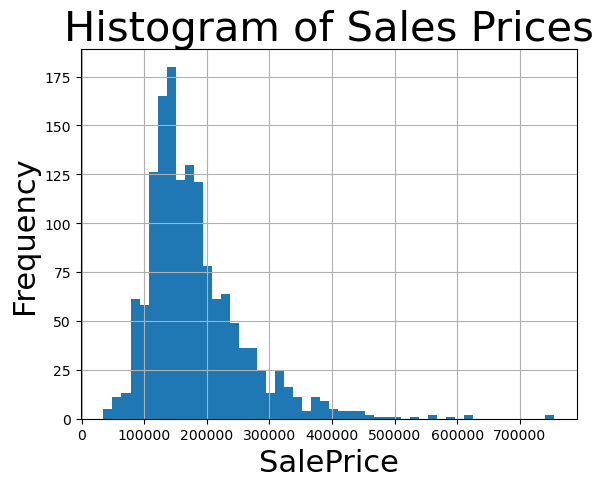

In [7]:
train.SalePrice.hist(bins=50)
plt.title('Histogram of Sales Prices', fontsize = 30)
plt.xlabel('SalePrice', fontsize = 22)
plt.ylabel('Frequency', fontsize = 22)

# Separating numeric and categorical features

There are two kinds of features, numercal and categorical features. Numerical features are numbers that can be measured and organized in a logical way. On the other hand, categorical features just take a limited number of values that can be organized or not. The analises we do for for numeric features is diferent from the analises we do for categorical features, then we need to separate them.

In [8]:
# here we select numeric features
trainumeric=train.select_dtypes(include=['int64','float64'])
trainumeric.drop(['Id', 'SalePrice'], axis=1, inplace=True)
listtrainumeric=list(trainumeric)
trainumeric.shape

(1460, 36)

In [9]:
# here we select object features
trainobj=train.select_dtypes(include=['object'])
listtrainobj=list(trainobj)
trainobj.shape

(1460, 43)

# Correlation between numeric features and Sales Price

Here, we analyze the correlation between all the numeric features and sale prices. We order the correlations from negative to positive. Negative correlation means that the two variables grow in oposite directions, positive correlations means that the variables grown in the same direction, and correlations near zero means that there is no patern between the two variables.

In [10]:
coefcorr={}
for i in listtrainumeric:
    coefcorr[i]=round(trainumeric[i].corr(train['SalePrice']),3)

sorted_coefcorr = sorted(coefcorr.items(), key=lambda x:x[1])
print(sorted_coefcorr)

[('KitchenAbvGr', -0.136), ('EnclosedPorch', -0.129), ('MSSubClass', -0.084), ('OverallCond', -0.078), ('YrSold', -0.029), ('LowQualFinSF', -0.026), ('MiscVal', -0.021), ('BsmtHalfBath', -0.017), ('BsmtFinSF2', -0.011), ('3SsnPorch', 0.045), ('MoSold', 0.046), ('PoolArea', 0.092), ('ScreenPorch', 0.111), ('BedroomAbvGr', 0.168), ('BsmtUnfSF', 0.214), ('BsmtFullBath', 0.227), ('LotArea', 0.264), ('HalfBath', 0.284), ('OpenPorchSF', 0.316), ('2ndFlrSF', 0.319), ('WoodDeckSF', 0.324), ('LotFrontage', 0.352), ('BsmtFinSF1', 0.386), ('Fireplaces', 0.467), ('MasVnrArea', 0.477), ('GarageYrBlt', 0.486), ('YearRemodAdd', 0.507), ('YearBuilt', 0.523), ('TotRmsAbvGrd', 0.534), ('FullBath', 0.561), ('1stFlrSF', 0.606), ('TotalBsmtSF', 0.614), ('GarageArea', 0.623), ('GarageCars', 0.64), ('GrLivArea', 0.709), ('OverallQual', 0.791)]


Now, let's take a look at the variables that have a high correlation with sales price. In the case of this notebook, we choose variables that have correlation higher than 0.5:

In [11]:
correl=[]
high_corr=[]
for i in range(36):
    x=trainumeric.iloc[:,i]
    y= train['SalePrice']
    correl.append(x.corr(y))
#    print(listtrainumeric[i],'=>', r[i])
    if (correl[i]>0.5 or correl[i]<-0.5):
        high_corr.append(listtrainumeric[i])
        
print(high_corr)


['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


Here we make a scatter plot of all numeric variables highly correlated to SalePrice verses sale prices in order to see if there is any clear pathern between them. As expected we observe that the Salerice increases with the increase of the variables. 

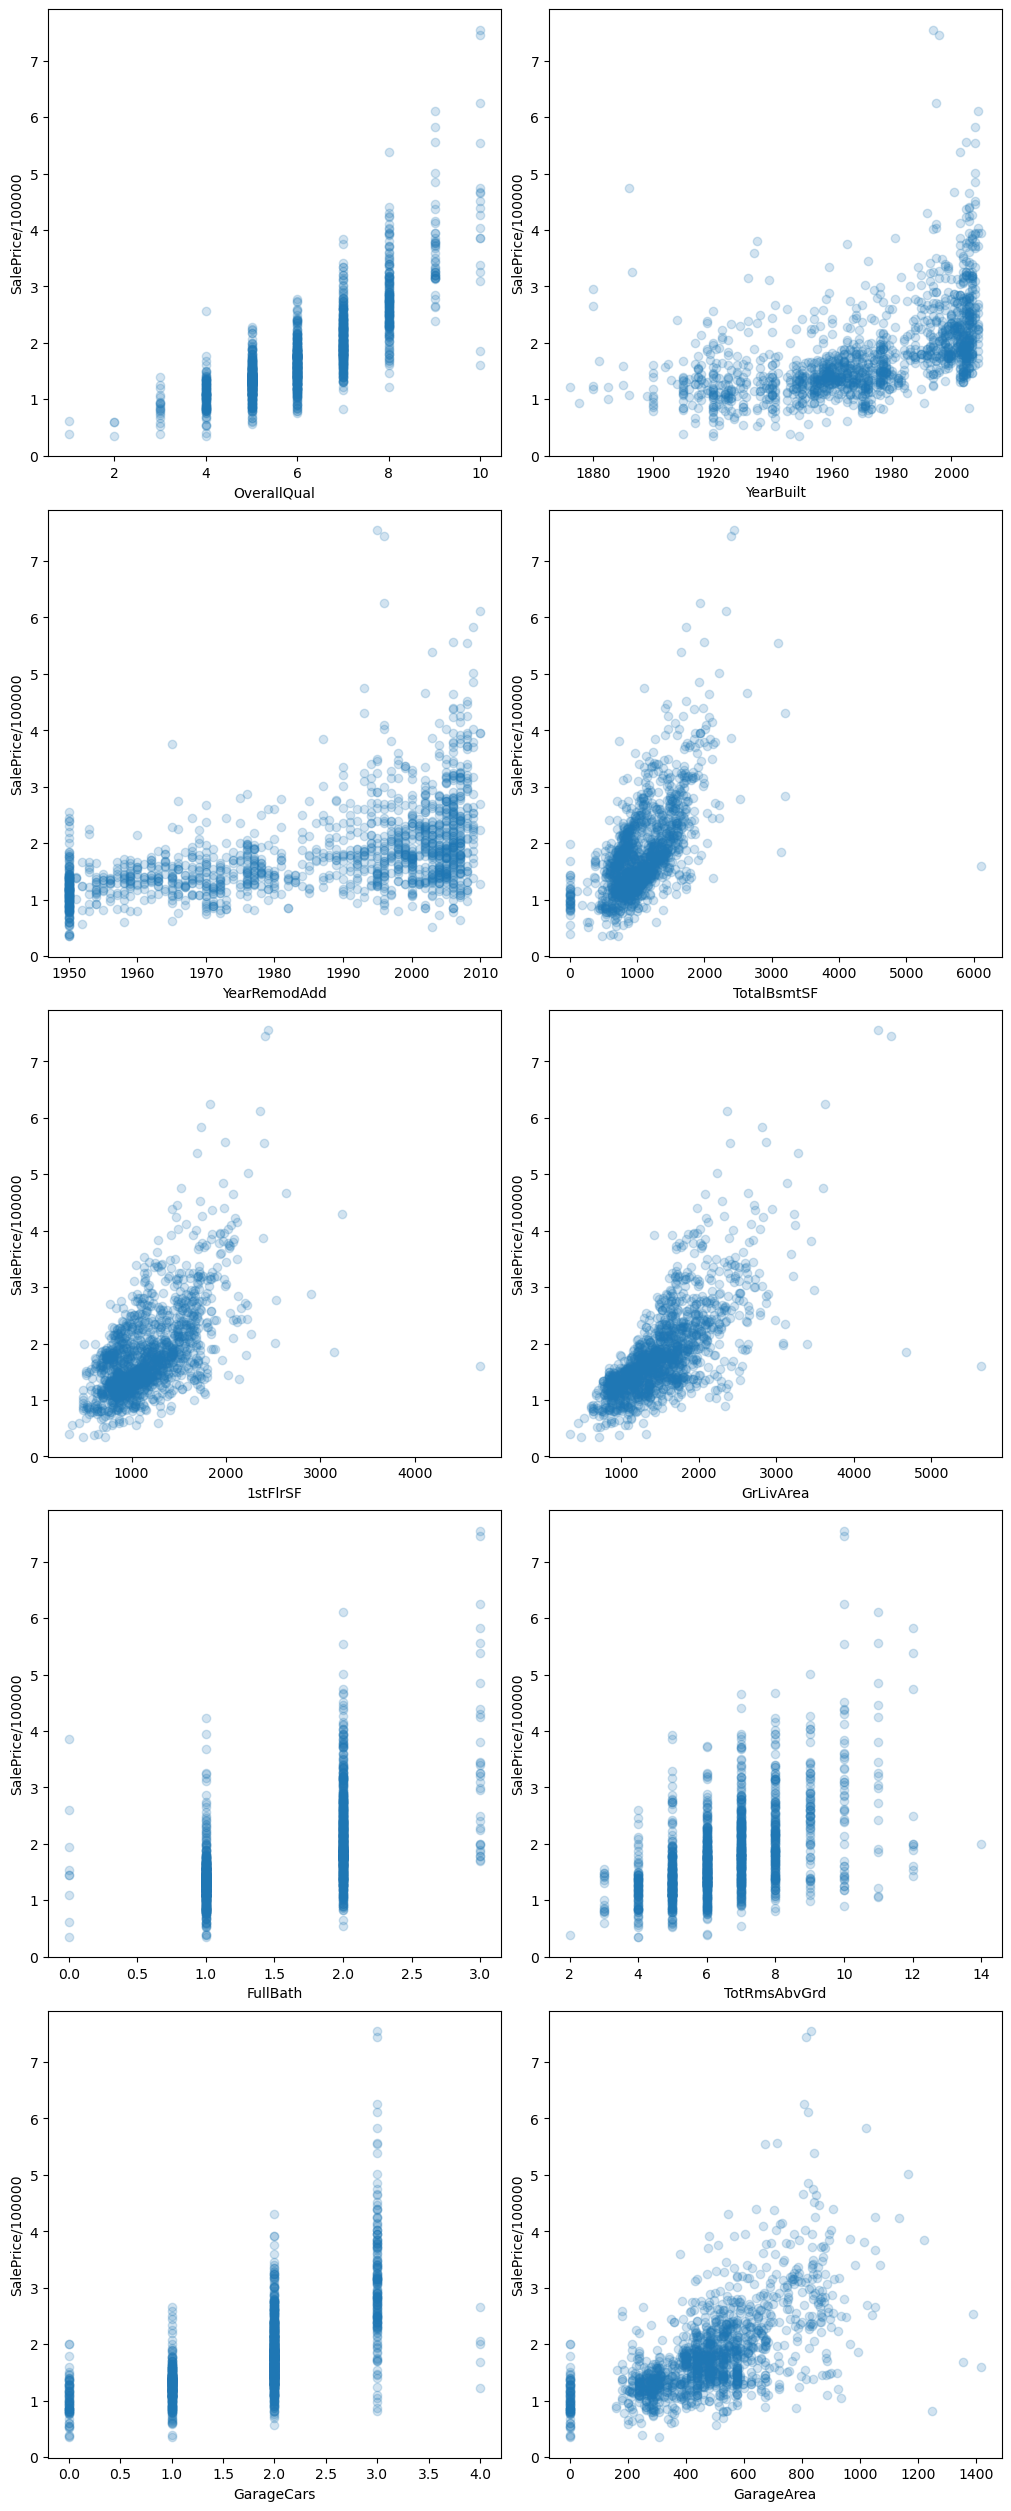

In [12]:
%matplotlib inline

fig, axs = plt.subplots(5,2, constrained_layout=True, figsize=(10, 25))
ax=axs.T.flatten()

trainumeric2=trainumeric[high_corr]
for i in range(len(high_corr)):
    ax = plt.subplot(5, 2, i+1)
    x=trainumeric2.iloc[:,i].values
    y= train['SalePrice'].values/100000
    ax.plot(x, y, 'o', alpha=0.2)
    ax.set_xlabel(high_corr[i])
    ax.set_ylabel('SalePrice/100000')

# Correlation between numeric features

We can calculate the correlation between features to find wich variables are representing nearly the same thing. We find that the pairs: (TotalBsmtSF, 1stFlrSF), (GrLivArea, TotRmsAbvGrd), (GarageCars, GarageArea) are highly correlated and therefore, represent nearly the same thing.


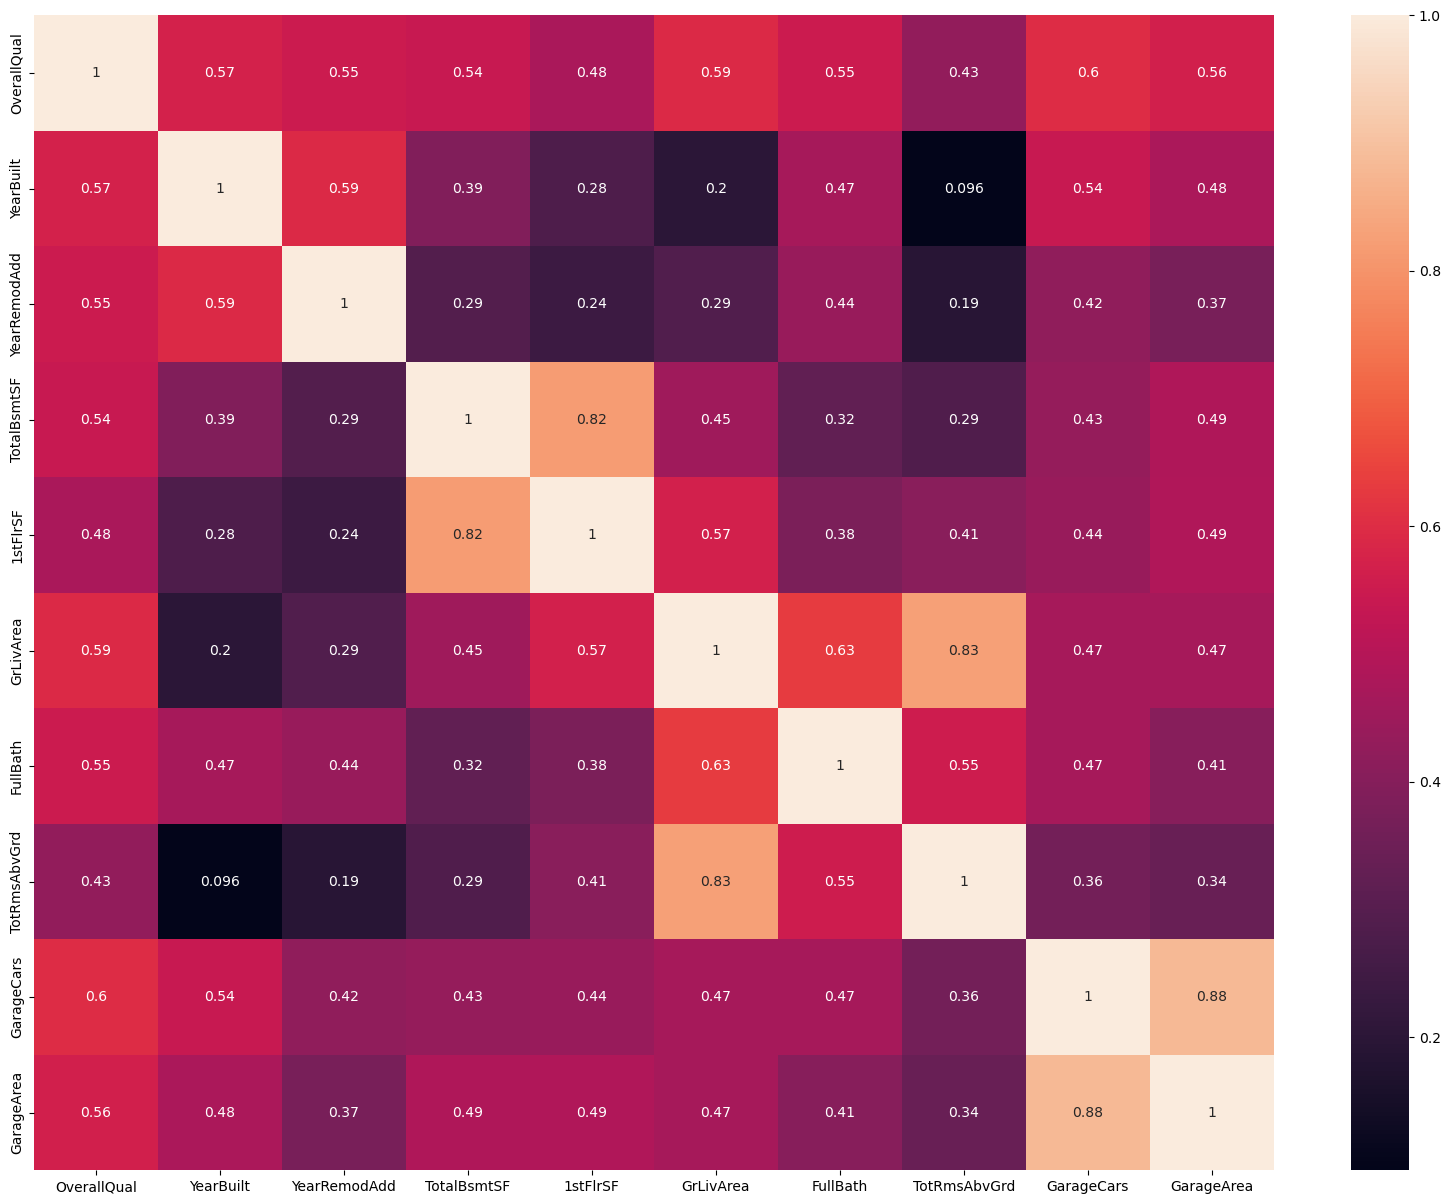

In [13]:
import seaborn as sns

trainumeric2=trainumeric[high_corr]
#plotting the heatmap for correlation
plt.subplots(figsize=(20,15))
ax = sns.heatmap(trainumeric2.corr(), annot=True)

In [14]:
trainumeric3=trainumeric2.dropna()
listtrainumeric3=trainumeric3.columns.tolist()
for i in range(len(listtrainumeric3)):
    for j in range(len(listtrainumeric3)):
        corr3=np.corrcoef(trainumeric3.iloc[:,i],trainumeric3.iloc[:,j])[0,1]
        if i!=j and corr3>=0.8:
            print(trainumeric3.columns[i],trainumeric3.columns[j])

TotalBsmtSF 1stFlrSF
1stFlrSF TotalBsmtSF
GrLivArea TotRmsAbvGrd
TotRmsAbvGrd GrLivArea
GarageCars GarageArea
GarageArea GarageCars


# Visualization of categorical features

The first column display the frequency of each category of the categorical features. We can notice is that there are categorical features were just one of the categories have more than 70% of the data. They are: Street, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, BldgTipe, RoofStyle, RoofMatl, ExterCond, BsmtCond, BsmtFinType2, Heating, CentralAir, Eletrical, Functional, GarageQual, GarageCond, PavedDrive, SaleTipe and SaleCondition. Those categories will not make much diference in a random tree model.

Another thing that we notice is that there are columns with few data: Alley, PoolQC, Fence and MiscFeature. Those Columns are not relevant to characterise the data.

The most important features to analise are LotShape, Neighborhood, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageType, GarageFinish.

The second column display the mean and standard deviation of SalePrice Normalized by a factor of 100000. Analizing the mean values we can see how the prices variate with the category. We see that for the most part of the categories the variance is big, the exception are the categories with very few data. The big oscilations are due to the interference of other features in the sales price.

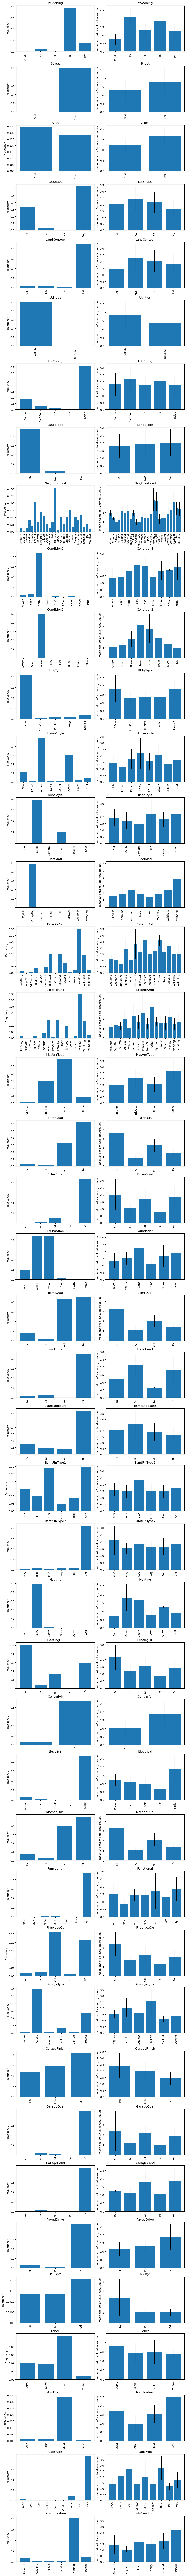

In [15]:
trainobj['SalePrice']=train['SalePrice']/100000

fig, axs = plt.subplots(43,2, constrained_layout=True, figsize=(10, 140))
ax=axs.T.flatten()

js=range(0,86,2)

for i,j in zip(listtrainobj, js):
    ax = plt.subplot(43, 2, j+1)
    freq=trainobj.groupby([i]).SalePrice.count()/len(trainobj['SalePrice'])
    ax.bar(x=freq.index, height=freq)
    ax.set_ylabel('Frequency')
    ax.set_title(i)
    plt.xticks(rotation = 90)
    
    ax = plt.subplot(43, 2, j+2)
    mean1=trainobj.groupby([i]).SalePrice.mean()
    std1=trainobj.groupby([i]).SalePrice.std()
    ax.bar(x=mean1.index, height=mean1, yerr=std1)
    ax.set_ylabel('mean and std of SalePrice/100000')
    ax.set_title(i)
    plt.xticks(rotation = 90)
    
plt.show()